In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Tutorial 2: Chebyshev Polynomials

In [3]:
N = 8
x = np.arange(0, np.pi, np.pi/(N-1))
x_i = np.cos(x)

In [7]:
ToPhys = np.zeros((8, 8))
for i in range(N):
    for j in range(N):
        ToPhys[i,j] = np.cos(np.pi*i*j/(N-1))
print(ToPhys)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [ 1.          0.90096887  0.6234898   0.22252093 -0.22252093 -0.6234898
  -0.90096887 -1.        ]
 [ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
   0.6234898   1.        ]
 [ 1.          0.22252093 -0.90096887 -0.6234898   0.6234898   0.90096887
  -0.22252093 -1.        ]
 [ 1.         -0.22252093 -0.90096887  0.6234898   0.6234898  -0.90096887
  -0.22252093  1.        ]
 [ 1.         -0.6234898  -0.22252093  0.90096887 -0.90096887  0.22252093
   0.6234898  -1.        ]
 [ 1.         -0.90096887  0.6234898  -0.22252093 -0.22252093  0.6234898
  -0.90096887  1.        ]
 [ 1.         -1.          1.         -1.          1.         -1.
   1.         -1.        ]]


In [ ]:
ToSpec = np.zeros((N, N))
cbar = np.ones((N, N))
for i in range(N):
    for j in range(N):
        if j = 0 or j = N-1:
            cbar[i, j] = 2
        else:
            cbar[i, j] = 1

for i in range(N):
    for j in range(N):
        ToSpec[i, j] = 

In [8]:
# Contians Answers

def ChebyshevHelpers(N, a=-1., b=1.):
    """
        Given an expansion order N, compute and return the
        following five objects useful for Chebyshev series:
        
        x --      collocation points covering the interval [a,b]
        ToSpec -- matrix that transforms real space values u_i to
                  spectral coefficients \tilde u_k        
        ToPhys -- matrix that transforms spectral coefficients
                  \tilde u_k to real space values u_i        
        D1 -- real-space differentiation matrix
        D2 -- real-space 2nd derivative differentiation matrix
        
        x is a numpy array of length N, everything else are NxN matrices
    """

    # Collocation points: 
    x = np.cos(np.pi* np.arange(0, N) / (N-1))
    
    # ToPhys matrix: Coeff. space -----> Real space
    ToPhys = np.zeros(shape = (N, N))
    for i in range(N):
        for k in range(N):
            ToPhys[i, k] = np.cos(np.pi*i*k/(N-1))
       
    # ToSpec matrix: Real space ------> Coeff space
    cbar = np.ones(N) # Definition of "cbar"
    cbar[0] = cbar[-1] = 2.
    ToSpec = np.zeros(shape = (N,N))
    for i in range(N):
        for j in range(N):
            ToSpec[i, j] = (np.cos(np.pi*j*i/(N-1))/cbar[j]) * 2/(cbar[i]*(N-1))
    
    # D_tilde matrix: Spectral differentiation matrix
    c = np.ones(N) # Definition of "c"
    c[0] = 2
    Dtilde=np.zeros( shape = (N,N) )
    for k in reversed(range(N-1)):
        if k<=N-3:
            Dtilde[k,:]=1/c[k]*Dtilde[k+2,:]
        Dtilde[k,k+1]+=2*(k+1)/c[k]
    
    # D1 matrix: First-derivative matrix
    D1 = ToPhys @ Dtilde @ ToSpec
    
    # D2 matrix: Second-derivative matrix
    D2 = ToPhys @ Dtilde @ Dtilde @ ToSpec
    
    return x, ToSpec, ToPhys, D1, D2

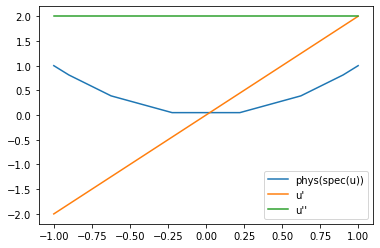

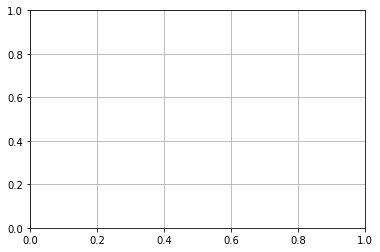

In [9]:
N=8 # (or 16, or ...)
x,ToSpec,ToPhys,D1,D2 = ChebyshevHelpers(N)
u = x**2
plt.figure()
plt.plot(x, ToPhys @ (ToSpec @ u), label="phys(spec(u))")
plt.plot(x, D1 @ u, label="u'")
plt.plot(x, D2 @ u, label="u''")
plt.legend()
plt.show()
plt.grid()